#**Parameter Analysis for the ARIMA model**

## Import the library


In [28]:
# To install the library
!pip install pmdarima

# Import the library
from pmdarima import auto_arima
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

## Read dataset

In [19]:
df = pd.read_csv('/content/traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [3]:
df = df.drop(['Junction','ID'],axis=1)
df.head()

,DateTime,Vehicles
0,2015-11-01 00:00:00,15
1,2015-11-01 01:00:00,13
2,2015-11-01 02:00:00,10
3,2015-11-01 03:00:00,7
4,2015-11-01 04:00:00,9


In [4]:
df['DateTime'] = pd.to_datetime(df['DateTime']).dt.date
df.set_index('DateTime', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48120 entries, 2015-11-01 to 2017-06-30
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Vehicles  48120 non-null  int64
dtypes: int64(1)
memory usage: 751.9+ KB


In [16]:
df.tail()

,Vehicles
DateTime,
2015-11-01,15
2015-11-01,13
2015-11-01,10
2015-11-01,7
2015-11-01,9


In [21]:
df = df.iloc[:1000]

## Fit auto_arima function to AirPassengers dataset


In [22]:
stepwise_fit = auto_arima(df['Vehicles'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m =3,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[3] intercept   : AIC=inf, Time=3.76 sec
 ARIMA(0,0,0)(0,1,0)[3] intercept   : AIC=6662.704, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[3] intercept   : AIC=5923.899, Time=1.71 sec
 ARIMA(0,0,1)(0,1,1)[3] intercept   : AIC=6126.516, Time=0.50 sec
 ARIMA(0,0,0)(0,1,0)[3]             : AIC=6660.705, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[3] intercept   : AIC=6086.084, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[3] intercept   : AIC=5791.034, Time=0.83 sec
 ARIMA(1,0,0)(2,1,1)[3] intercept   : AIC=inf, Time=3.25 sec
 ARIMA(1,0,0)(1,1,1)[3] intercept   : AIC=inf, Time=2.15 sec
 ARIMA(0,0,0)(2,1,0)[3] intercept   : AIC=6594.196, Time=0.37 sec
 ARIMA(2,0,0)(2,1,0)[3] intercept   : AIC=5781.515, Time=0.94 sec
 ARIMA(2,0,0)(1,1,0)[3] intercept   : AIC=5906.118, Time=0.51 sec
 ARIMA(2,0,0)(2,1,1)[3] intercept   : AIC=inf, Time=5.47 sec
 ARIMA(2,0,0)(1,1,1)[3] intercept   : AIC=inf, Time=2.43 sec
 ARIMA(2,0,1)(2,1,0)[3] intercept   : AIC=5785.106, Time=2

## To print the summary


In [23]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1000
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 3)   Log Likelihood               -2884.758
Date:                           Thu, 22 Aug 2024   AIC                           5779.515
Time:                                   08:31:16   BIC                           5804.039
Sample:                                        0   HQIC                          5788.837
                                          - 1000                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9125      0.025     37.033      0.000       0.864       0.961
ar.L2         -0.1085      0.026     -4.229      0.000      -0.159      -0.058
ar.S.L3       -0.5944      0.032    -18.786      0.000      -0.656      -0.532
ar.S.L6       -0.3564      0.033    -10.645      0.000      -0.422      -0.291
sigma2        19.0484      0.573     33.228      0.000      17.925      20.172
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):               392.02
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             0.86
Prob(H) (two-sided):                  0.24   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fit ARIMA Model

## Split data into train / test sets


In [24]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year(12 months) for testing


## Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Vehicles'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Vehicles   No. Observations:                  988
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -2551.558
Date:                            Thu, 22 Aug 2024   AIC                           5113.116
Time:                                    08:31:37   BIC                           5137.529
Sample:                                         0   HQIC                          5122.406
                                            - 988                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3658      0.026    -14.061      0.000      -0.417      -0.315
ar.S.L12      -0.2662      0.033     -8.052      0.000      -0.331      -0.201
ar.S.L24       0.3008      0.026     11.752      0.000       0.251       0.351
ma.S.L12      -0.9997      1.683     -0.594      0.553      -4.298       2.299
sigma2        10.3643     17.388      0.596      0.551     -23.716      44.444
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               698.48
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.89
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions of ARIMA Model against the test set

In [26]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

## plot predictions and actual values



<Axes: >

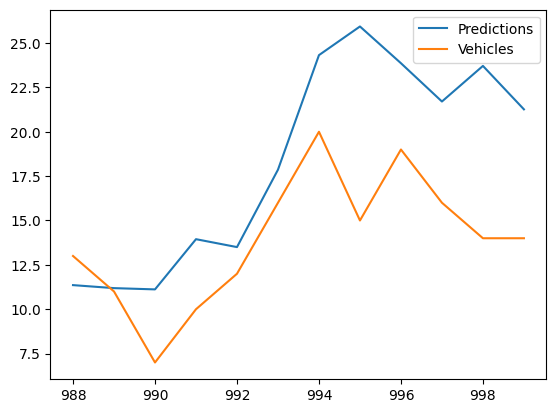

In [27]:
predictions.plot(legend = True)
test['Vehicles'].plot(legend = True)

## Evaluate the model using MSE and RMSE

In [30]:
# Calculate root mean squared error
rmse(test['Vehicles'], predictions)

# Calculate mean squared error
mean_squared_error(test['Vehicles'], predictions)

31.861780951201123

#**Well Done :)**